# Punto 1

## 1. Modificación del generador de dataset aleatorio

Se implementó un generador de datos sintéticos usando la función `make_blobs` de scikit-learn, permitiendo elegir el número de centroides entre 1 y 20 y asegurando que estén bien separados (distancias mínimas entre centroides). Esto facilita la verificación visual de los clusters generados.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
import modal
import modAL

- **Código:**  
  Se creó una función `generar_centroides(n_centroides, distancia)` que posiciona los centroides aleatoriamente pero separados en el plano.
- **Parámetro:**  
  Para este experimento se usaron **7 centroides** y 2000 muestras, con diferentes dispersiones de cada grupo.

In [6]:
def generar_centroides(n_centroides, distancia=10, random_state=42):
    """
    Genera n_centroides en 2D, separados una 'distancia' mínima aproximada.
    """
    np.random.seed(random_state)
    return np.random.uniform(-distancia, distancia, size=(n_centroides, 2))

# Cambia este número entre 1 y 20 para probar distintos casos visualmente
n_centroides = 7
blob_centers = generar_centroides(n_centroides, distancia=10)
blob_std = np.random.uniform(0.4, 0.8, size=n_centroides)  # Dispersión variada

X, y_true = make_blobs(
    n_samples=2000,
    centers=blob_centers,
    cluster_std=blob_std,
    random_state=42
)

## 2. Visualización de los datos generados

Se graficaron los datos sintéticos con los 7 centroides.  
**Gráfica 1:**  


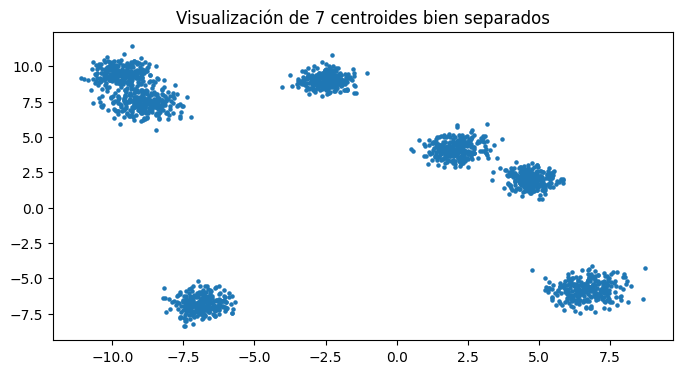

In [7]:
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.title(f"Visualización de {n_centroides} centroides bien separados")
plt.show()


- **Interpretación:**  
  Se observa claramente la existencia de 7 grupos, bien separados, lo que valida la correcta configuración del generador de datos y la separación entre los clusters.

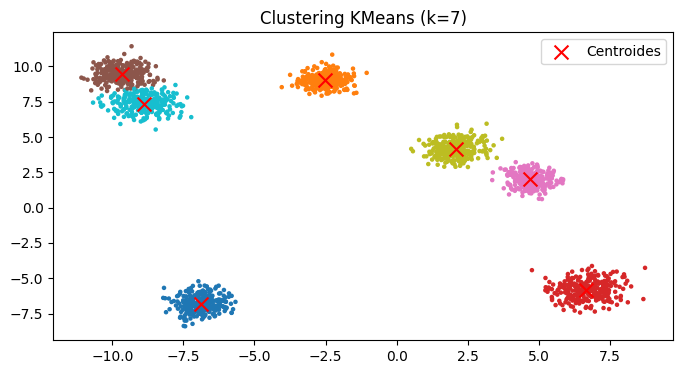

In [8]:
k = n_centroides
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=5, cmap='tab10')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            c='red', marker='x', s=100, label='Centroides')
plt.title(f"Clustering KMeans (k={k})")
plt.legend()
plt.show()

- **Interpretación:**  
  El algoritmo KMeans fue capaz de identificar los 7 clusters correctamente. Cada color representa un grupo identificado y las 'X' rojas marcan los centroides calculados, que corresponden a los centros de cada grupo de datos.

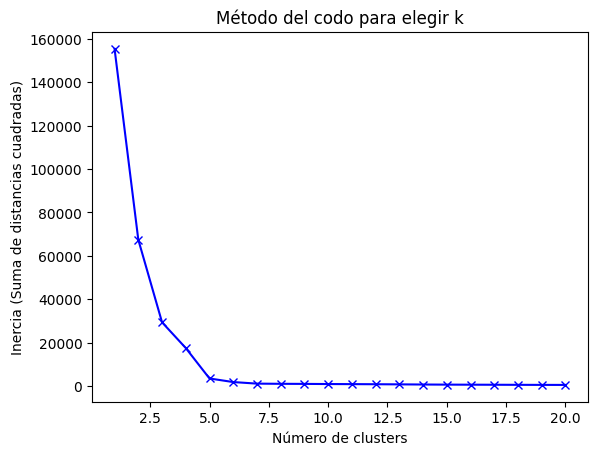

In [9]:
inertias = []
K = range(1, 21)
for k_ in K:
    km = KMeans(n_clusters=k_, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(K, inertias, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia (Suma de distancias cuadradas)')
plt.title('Método del codo para elegir k')
plt.show()

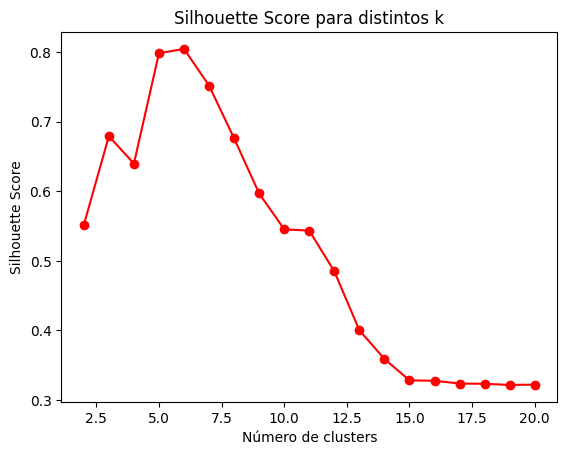

In [10]:
scores = []
K2 = range(2, 21)
for k_ in K2:
    km = KMeans(n_clusters=k_, random_state=42)
    labels = km.fit_predict(X)
    scores.append(silhouette_score(X, labels))

plt.plot(K2, scores, 'ro-')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para distintos k')
plt.show()

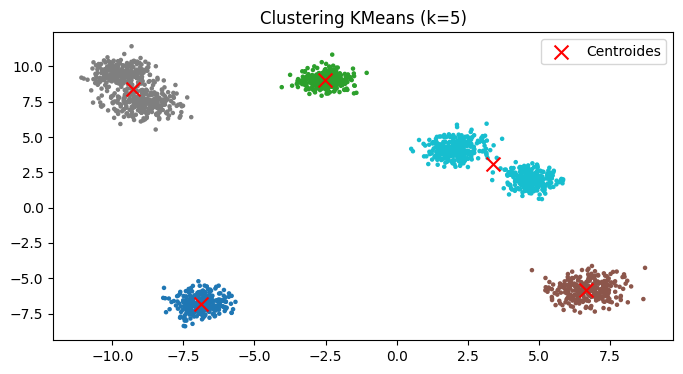

In [11]:
# Basándonos en el método del codo, usamos 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X)

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=5, cmap='tab10')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            c='red', marker='x', s=100, label='Centroides')
plt.title("Clustering KMeans (k=5)")
plt.legend()
plt.show()

In [12]:
# Celda 7: Cargar imágenes y convertir a vectores (puedes adaptar para audio/texto)
from PIL import Image
import os

def load_images_from_folder(folder, size=(64, 64), max_imgs=300):
    """
    Carga imágenes de una carpeta, las escala a 'size' y las aplana.
    Devuelve una matriz (n_imagenes, size[0]*size[1])
    """
    data = []
    files = os.listdir(folder)
    count = 0
    for filename in files:
        if count >= max_imgs:
            break
        file_path = os.path.join(folder, filename)
        try:
            img = Image.open(file_path).convert('L').resize(size)
            data.append(np.array(img).flatten())
            count += 1
        except:
            continue
    return np.array(data)

# Ruta a tu carpeta de imágenes. Cambia por la tuya.
folder_path = r"C:\Users\Felix\Downloads\all_images"
X_real = load_images_from_folder(folder_path, size=(64,64), max_imgs=300)
print("Shape de X_real:", X_real.shape)

Shape de X_real: (300, 4096)


In [13]:
# Celda 8: Clustering con KMeans sobre datos reales
k_real = 10
kmeans_real = KMeans(n_clusters=k_real, random_state=42)
y_pred_real = kmeans_real.fit_predict(X_real)


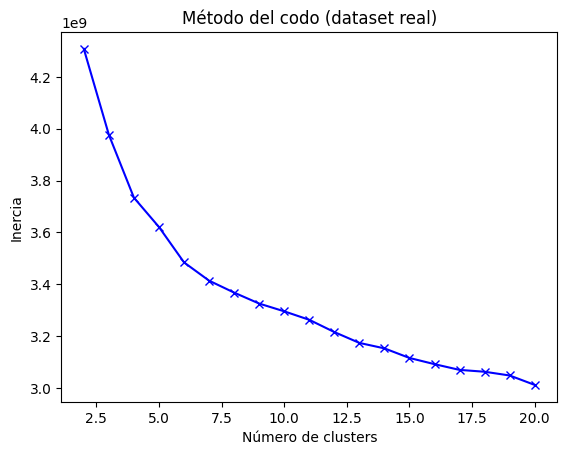

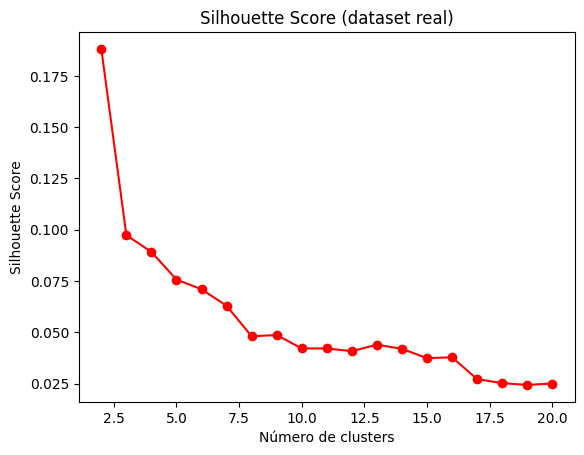

In [14]:
# Celda 9: Método del codo y Silhouette Score (dataset real)
inertias_real = []
scores_real = []
K_real = range(2, 21)
for k_ in K_real:
    km = KMeans(n_clusters=k_, random_state=42)
    y_tmp = km.fit_predict(X_real)
    inertias_real.append(km.inertia_)
    scores_real.append(silhouette_score(X_real, y_tmp))

plt.plot(K_real, inertias_real, 'bx-')
plt.title("Método del codo (dataset real)")
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

plt.plot(K_real, scores_real, 'ro-')
plt.title("Silhouette Score (dataset real)")
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [15]:
# Celda 10: Aprendizaje semisupervisado
from sklearn.semi_supervised import LabelSpreading

y_semi = np.full(X_real.shape[0], -1)
y_semi[:10] = y_pred_real[:10]  # Etiquetas manuales para los primeros 10

label_spread = LabelSpreading(kernel='knn')
label_spread.fit(X_real, y_semi)
y_semi_pred = label_spread.transduction_

print("Ejemplo de etiquetas inferidas semi-supervisadas:", y_semi_pred[:20])


Ejemplo de etiquetas inferidas semi-supervisadas: [3 9 6 3 6 3 2 9 4 3 9 3 3 6 3 6 3 3 3 3]


In [16]:
# Celda 11: Aprendizaje activo (simulado)
from sklearn.ensemble import RandomForestClassifier

# Entrena con los ejemplos etiquetados
mask = y_semi != -1
clf = RandomForestClassifier()
clf.fit(X_real[mask], y_semi[mask])
probs = clf.predict_proba(X_real[~mask])
uncertain_samples = np.argsort(np.max(probs, axis=1))[:10]
# Aquí deberías pedir la etiqueta al usuario para esos ejemplos y repetir el proceso

print("Índices de muestras más inciertas para etiquetar activamente:", uncertain_samples)

Índices de muestras más inciertas para etiquetar activamente: [ 62 164  97 251  99  29  14 100 152  15]
